## Model Inference

In [15]:
%run "Reusable_Functions.ipynb"

In [13]:
# Import data offline
cplr_noisy = import_DB('db6_5SS_noisy_s20084.npz')
print(cplr_noisy.shape)
cplr_true = import_DB('db4_5SS_mirror_s20084.npz')
print(cplr_true.shape)

data_max=np.max([np.max(cplr_noisy),np.max(cplr_true)])
data_min=np.min([np.min(cplr_noisy),np.min(cplr_true)])
print(data_max)
print(np.abs(data_min))

# Renormalize DB from range [-1,1] to range [0,1] 
n_cplr_true=cplr_true/(np.abs(data_min)+data_max)+np.abs(data_min)
n_cplr_noisy=cplr_noisy/(np.abs(data_min)+data_max)+np.abs(data_min)

(20084, 100, 3)
(20084, 100, 3)
0.5570395753847958
0.5682779550021021


In [9]:
# Import autoencoder for z-space representation
import os
import numpy as np
from keras.models import Model, load_model

# Load Autoencoder model with Z=30
filename='AE_D0_val_loss_0.0092.h5'
path=os.path.join('models AE',filename)
AE_Z3 = load_model(path, custom_objects={'rmse': rmse})
E_Z3 = Model(AE_Z3.input, AE_Z3.layers[2].output)
E_Z3.summary()

z_param= E_Z3.predict(cplr_true)
print(z_param.shape)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 100, 3)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                9030      
Total params: 9,030
Trainable params: 9,030
Non-trainable params: 0
_________________________________________________________________
(20084, 30)


In [10]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=500)
labels=clustering.fit_predict(z_param)
print(labels.shape)

(20084,)


In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=500)
kmeans.fit(z_param)
labels=kmeans.predict(z_param)
centers = kmeans.cluster_centers_

Random index selected =  22


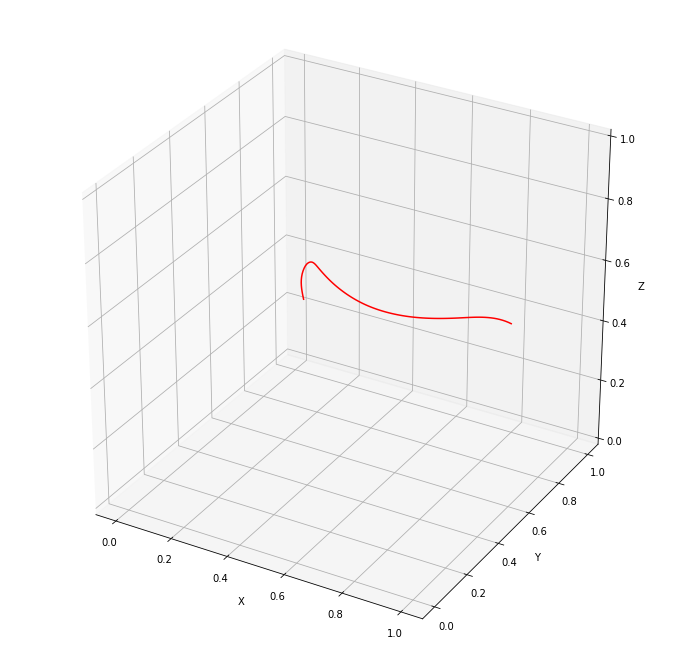

In [16]:
#Select an arbitrary path
n=random.randint(0, z_param.shape[0])
n=22 #22,49
print("Random index selected = ",n)
fig= plt.figure(figsize=(12, 12))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath3D(n_cplr_true[n], ax, 1,'r','X','Y','Z')

In [18]:
current_dir=os.getcwd()
db_path=os.path.join(current_dir,'..','1. DB Preprocessing','db4_5SS_mirror_s20084.npz')
db = np.load(db_path)
print(db.files)
mech=db['mechData']
print(mech.shape)
# Renormalize DB from range [-1,1] to range [0,1] 
n_mech=mech/(np.abs(data_min)+data_max)+np.abs(data_min)

['cplrData', 'mechData']
(20084, 11, 3)


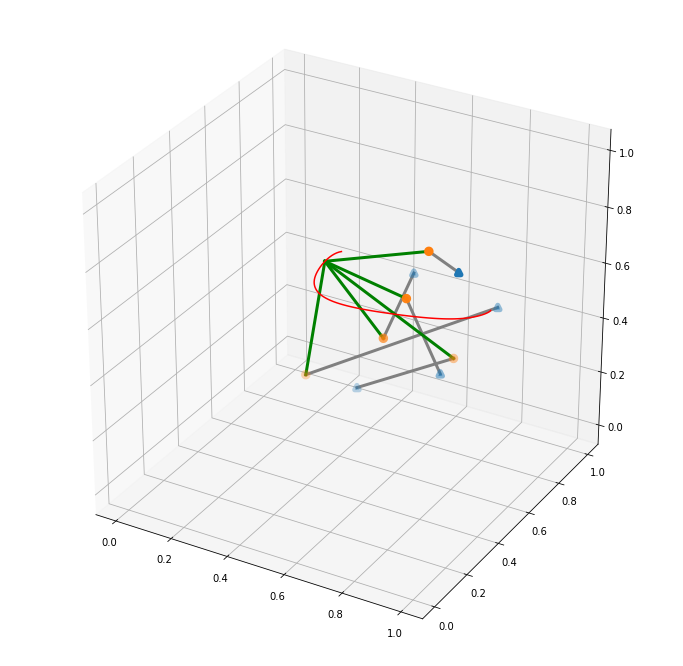

In [19]:
def plotLine3D(P1,P2,ax,color):
  ax.plot3D([P1[0],P2[0]], [P1[1],P2[1]], [P1[2],P2[2]],linewidth=3, color=color)

def plotMech5SS(mech,ax):
    Fp1=mech[0]; Fp2=mech[1];Fp3=mech[2]; Fp4=mech[3];Fp5=mech[4];
    Mp1=mech[5]; Mp2=mech[6];Mp3=mech[7]; Mp4=mech[8];Mp5=mech[9];
    C=mech[10];

    c1='grey'
    c2='g'
    plotLine3D(Fp1,Mp1,ax,c1)
    plotLine3D(Fp2,Mp2,ax,c1)
    plotLine3D(Fp3,Mp3,ax,c1)
    plotLine3D(Fp4,Mp4,ax,c1)
    plotLine3D(Fp5,Mp5,ax,c1)
    
    plotLine3D(Mp1,C,ax,c2)
    plotLine3D(Mp2,C,ax,c2)
    plotLine3D(Mp3,C,ax,c2)
    plotLine3D(Mp4,C,ax,c2)
    plotLine3D(Mp5,C,ax,c2)

    ax.scatter3D(mech[0:5,0],mech[0:5,1],mech[0:5,2],marker='^',linewidths=5)
    ax.scatter3D(mech[5:10,0],mech[5:10,1],mech[5:10,2],marker='o',linewidths=5)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

i=7
fig= plt.figure(figsize=(12, 12))
ax = plt.subplot(1, 1, 1, projection='3d')
plotMech5SS(n_mech[i],ax)
plotPath3D(n_cplr_true[i], ax, 1,'r' )

47


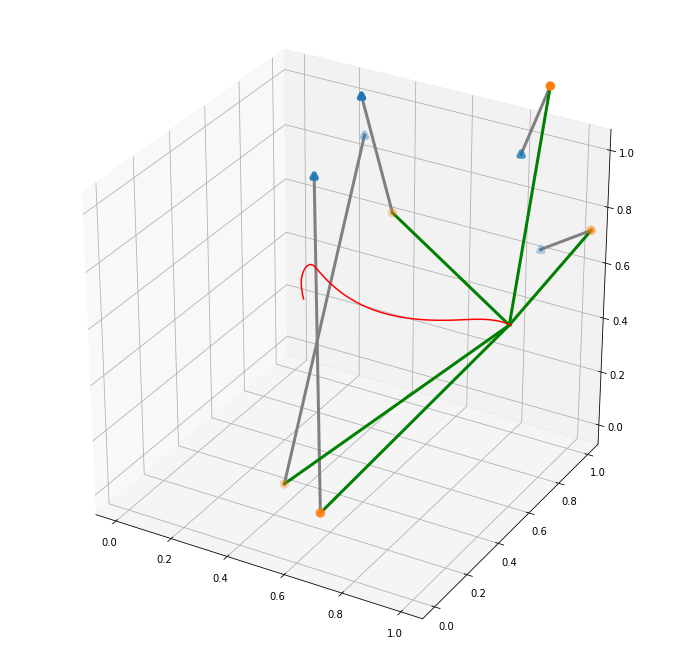

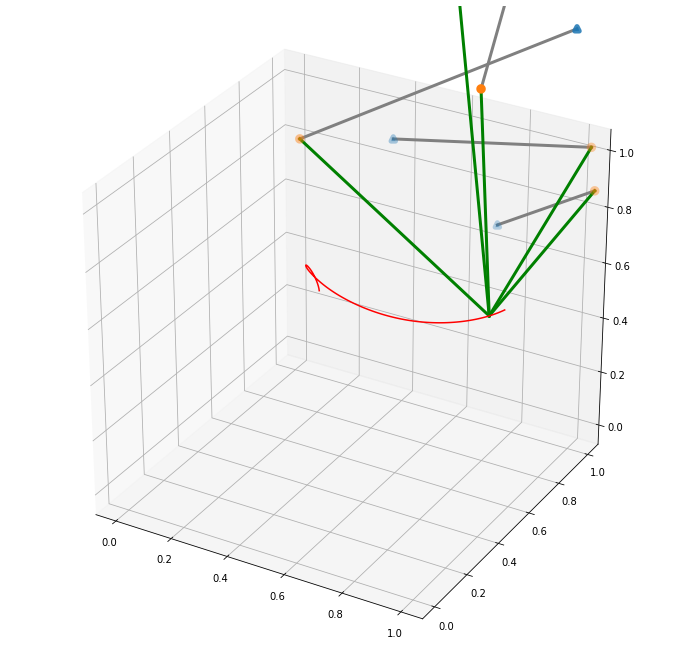

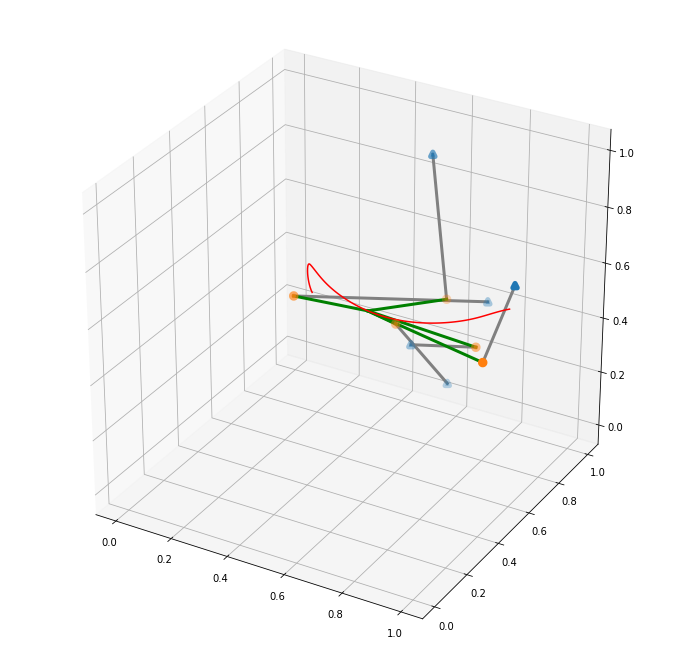

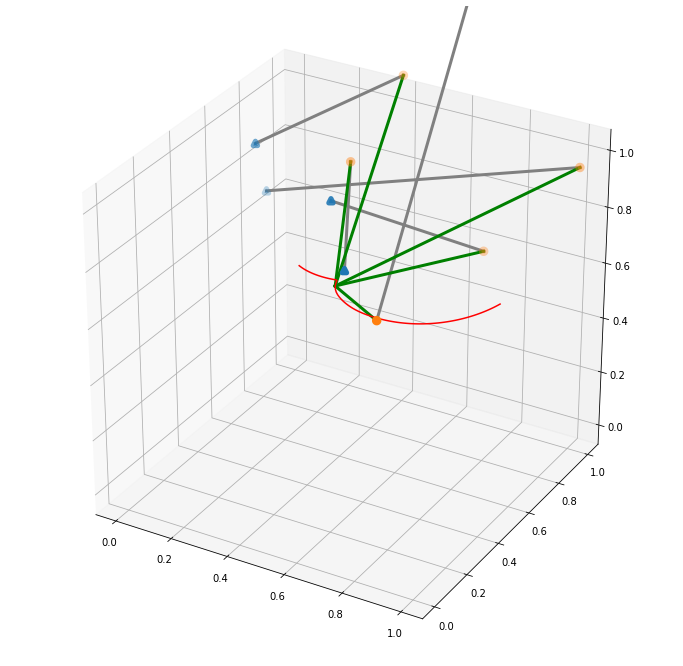

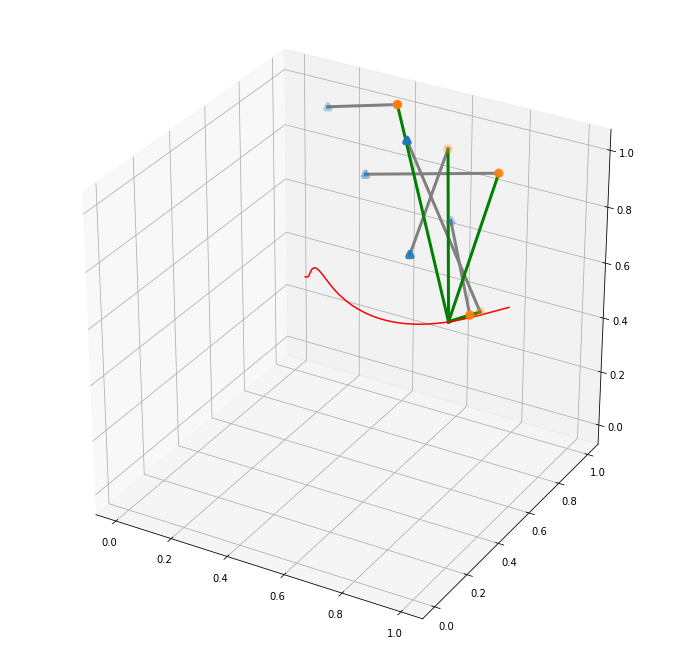

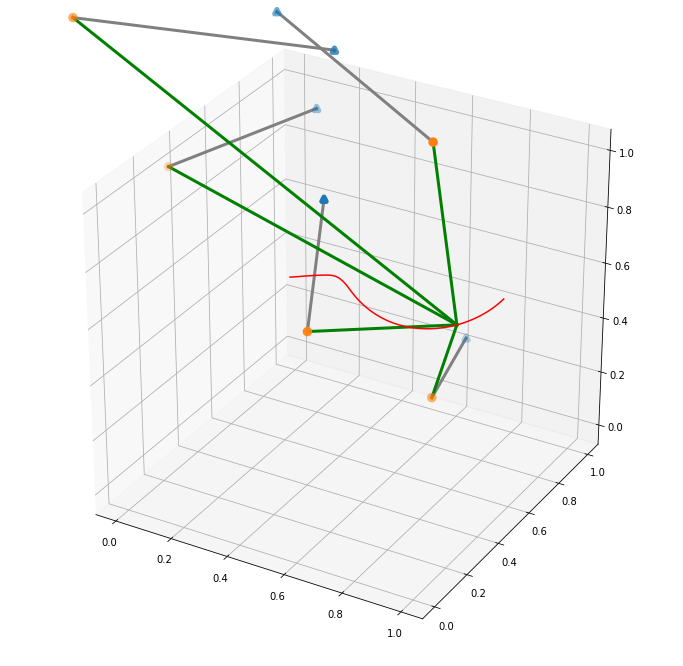

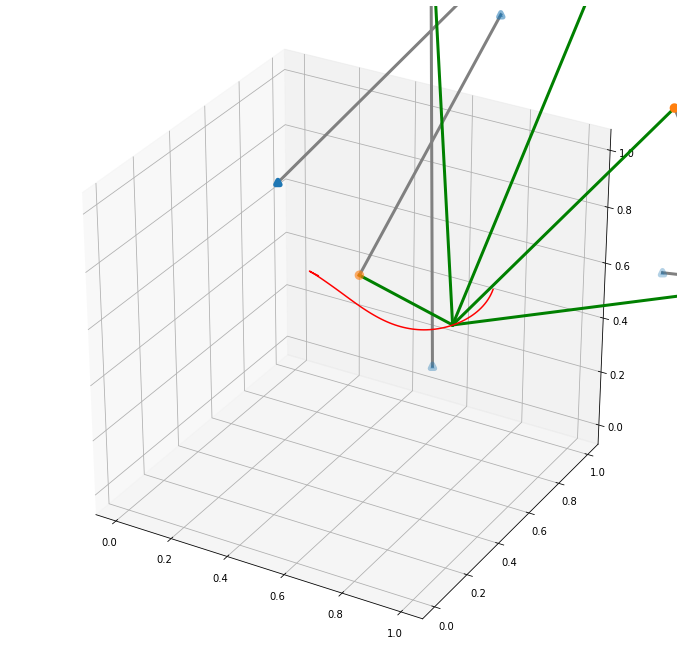

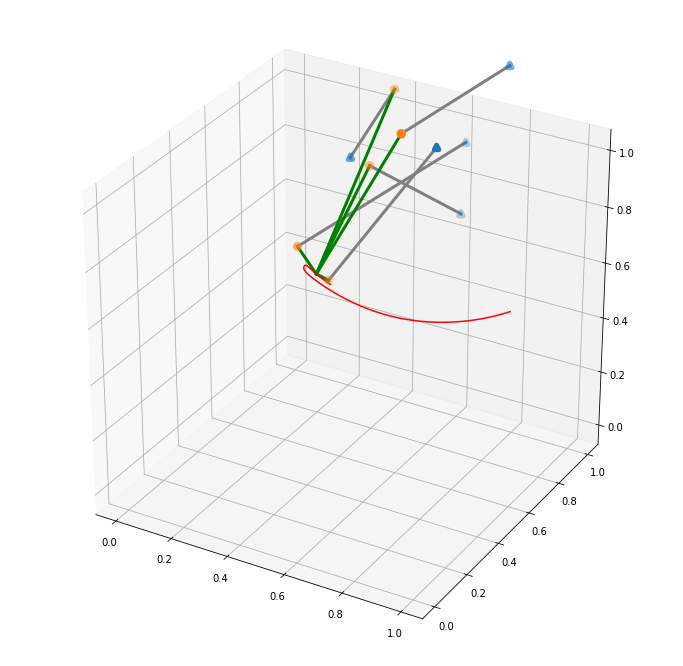

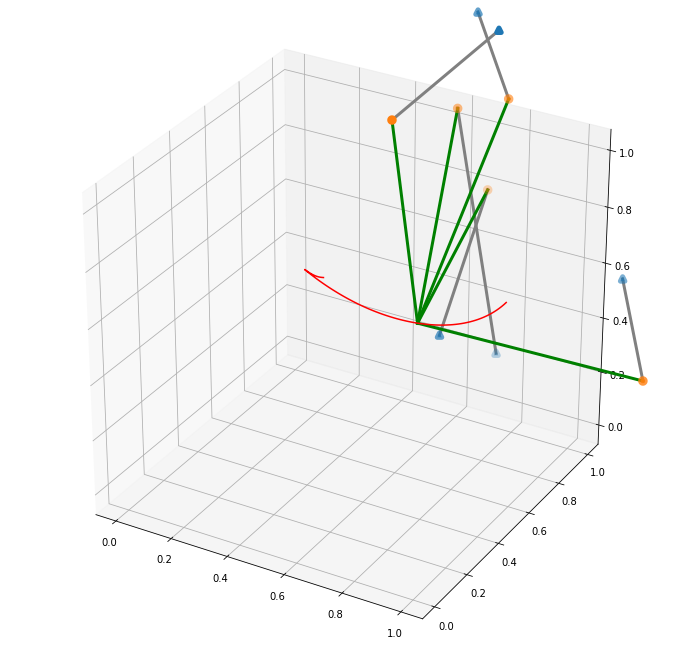

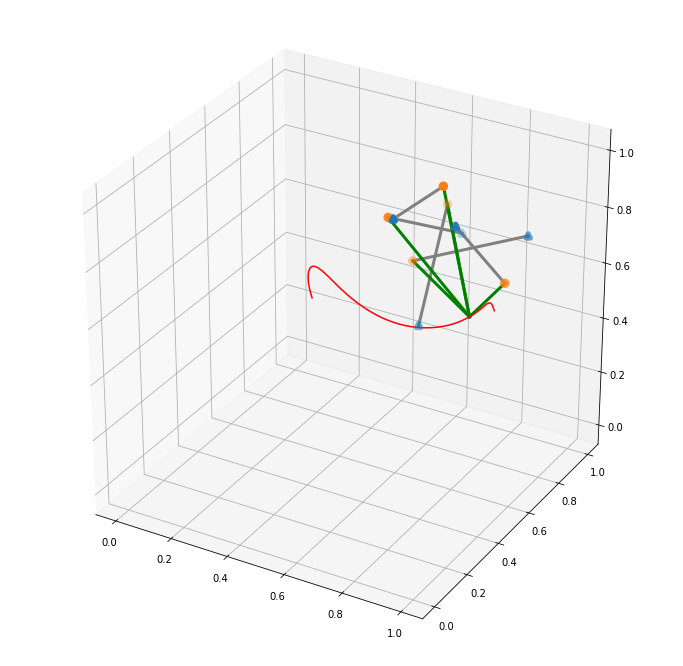

In [20]:
z_user=z_param[n]
minDist=99999999
group_id=-1
for i in range(500):
  d=np.linalg.norm(z_user-centers[i])
  if d<minDist:
    minDist=d
    group_id=i

sol=[]
for i in range(0,z_param.shape[0]):
  if labels[i]==group_id:
    sol.append(i)

for i in range(10):
    fig= plt.figure(figsize=(12, 12))
    ax = plt.subplot(1, 1, 1, projection='3d')
    plotMech5SS(n_mech[sol[i]],ax)
    plotPath3D(n_cplr_true[sol[i]], ax, 1,'r' )
    
print(len(sol))